# Exploratory Data Analysis (EDA & Visual EDA) con Pandas
#### UD1. Introducción al Machine Learning
#### MP. Sistemas de Aprendizaxe Automático
#### IES de Teis (Vigo), Vanesa Resúa Eiras, Cristina Gómez Alonso

En este segundo notebook analizaremos las funciones básicas de Pandas para explorar y analizar datos, así como la creación de gráficos básicos con Matplotlib.

### *Ejercicio 0*

Carga en un dataframe el fichero housing.csv. Si consultas la web de [kaggle](https://www.kaggle.com/camnugent/california-housing-prices) entenderás su contenido.

In [35]:
import pandas as pd

viviendas = pd.read_csv('housing.csv', index_col=False)
viviendas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## 1. Estructura básica e inspección

Las tablas en `pandas` son objetos de la clase `DataFrames`. Un `DataFrame` consta de dos partes: un índice y los datos propiamente dichos. Las columnas de los datos son de la clase `Series`.

Para consultar las columnas de un `DataFrame`, accedemos a la propiedad `columns`.

In [36]:
viviendas.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

Si además queremos saber el tipo del dato, accedemos a la propiedad `dtypes`.

*Nota*: las cadenas de texto se marcan como `object` dentro de un DataFrame

In [37]:
viviendas.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

Cada `DataFrame` tiene un índice. Si no lo hemos especificado, será un incremental sin relación con nuestros datos. El uso de índices está recomendado cuando tratamos con datos grandes, ya que permite acceder a las filas por _hash_ en lugar de tener que iterar por todas ellas para encontrar el valor que se busca. Los índices también son importantes a la hora de realizar agregaciones y cruces entre tablas.

Para consultar cuál es el índice de un DataFrame, accedemos a la propiedad `index`.

In [38]:
viviendas.index

RangeIndex(start=0, stop=20640, step=1)

Podemos alterarlo con `set_index`. El nuevo índice puede ser una o varias columnas.

In [39]:
viviendas_nuevo_indice = viviendas.set_index(['ocean_proximity', 'households'])
#set_index() no cambia el DataFrame original, a menos que añadas el parámetro inplace=True.
viviendas_nuevo_indice.head()
viviendas_nuevo_indice.index
viviendas_nuevo_indice

longitude  latitude  housing_median_age  \
ocean_proximity households                                            
NEAR BAY        126           -122.23     37.88                  41   
                1138          -122.22     37.86                  21   
                177           -122.24     37.85                  52   
                219           -122.25     37.85                  52   
                259           -122.25     37.85                  52   
...                               ...       ...                 ...   
INLAND          330           -121.09     39.48                  25   
                114           -121.21     39.49                  18   
                433           -121.22     39.43                  17   
                349           -121.32     39.43                  18   
                530           -121.24     39.37                  16   

                            total_rooms  total_bedrooms  population  \
ocean_proximity households                                            
NEAR BAY        126                 880           129.0         322   
                1138               7099          1106.0        2401   
                177                1467           190.0         496   
                219                1274           235.0         558   
                259                1627           280.0         565   
...                                 ...             ...         ...   
INLAND          330                1665           374.0         845   
                114                 697           150.0         356   
                433                2254           485.0        1007   
                349                1860           409.0         741   
                530                2785           616.0        1387   

                            median_income  median_house_value  
ocean_proximity households                                     
NEAR BAY        126                8.3252              452600  
                1138               8.3014              358500  
                177                7.2574              352100  
                219                5.6431              341300  
                259                3.8462              342200  
...                                   ...                 ...  
INLAND          330                1.5603               78100  
                114                2.5568               77100  
                433                1.7000               92300  
                349                1.8672               84700  
                530                2.3886               89400  

[20640 rows x 8 columns]

Una forma rápida de echar un vistazo a los datos es consultas las primeras o últimas filas del DataFrame, con las funciones `head` y `tail`.

In [40]:
viviendas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [41]:
viviendas.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


Podemos seleccionar un listado de columnas a devolver de la siguiente forma:

In [42]:
viviendas[['housing_median_age', 'population']].head()

,housing_median_age,population
0,41,322
1,21,2401
2,52,496
3,52,558
4,52,565


Para conocer el número de filas de una tabla hay varias opciones:

In [43]:
len(viviendas)

20640

In [44]:
viviendas.shape

(20640, 10)

##### Nota

El índice no forma parte propiamente de los datos:

In [45]:
viviendas_nuevo_indice.shape

(20640, 8)

### *Ejercicio 1*

* Carga en un dataframe el csv `dat/alquiler-madrid-municipios.csv` en una variable que se llame `alquiler`
* Examina las primeras y últimas filas
* Extrae el número de filas y columnas

In [46]:
import pandas as pd 

alquiler = pd.read_csv('alquiler-madrid-municipios.csv', index_col= False)
alquiler.head()



,municipio,ano,quarter,precio
0,Alcalá De Henares,2009,4,8.561386
1,Alcobendas,2009,4,NaN
2,Alcorcón,2009,4,8.792037
3,Alpedrete,2009,4,NaN
4,Aranjuez,2009,4,7.750625


In [47]:
alquiler.tail()

,municipio,ano,quarter,precio
1185,Torrelodones,2018,2,10.553534
1186,Tres Cantos,2018,2,10.781348
1187,Valdemoro,2018,2,7.812653
1188,Villanueva De La Cañada,2018,2,11.632276
1189,Villaviciosa De Odón,2018,2,14.050801


In [48]:
print(f"El numero de filas es {alquiler.shape[0]} y de columnas : {alquiler.shape[1]}")


El numero de filas es 1190 y de columnas : 4


## 2. Filtro y selección

Hay tres operadores fundamentales para seleccionar filas y columnas: `loc`, `iloc` y `[]`. La diferencia fundamental entre `loc` e `iloc` es que el primero requiere _etiquetas_ y el segundo, índices numéricos (la `i` inicial viene de `integer`).


### 2.1. Selección por índices numéricos

Para acceder por posición usando índices numéricos, se usa `iloc[]`, como en los siguientes ejemplos:

In [49]:
# por defecto, seleccionamos filas
viviendas_nuevo_indice.iloc[200]

longitude              -122.2300
latitude                 37.7800
housing_median_age       52.0000
total_rooms             862.0000
total_bedrooms          215.0000
population              994.0000
median_income             3.0257
median_house_value    80800.0000
Name: (NEAR BAY, 213), dtype: float64

In [50]:
# pero también se pueden seleccionar filas y columnas
# además, usando rangos
viviendas.iloc[3:5, 1:]

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [51]:
# índices no consecutivos
# recuerda: en python, se empieza a contar en 0
viviendas.iloc[[1, 2, 4], [0, 3]]

,longitude,total_rooms
1,-122.22,7099
2,-122.24,1467
4,-122.25,1627


In [52]:
# los índices negativos indican que se empieza a contar desde el final
viviendas.iloc[-3:-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


### *Ejercicio 2*

* Muestra las primeras 5 filas usando `iloc`
* Muestra las últimas 5 filas usando `iloc`

In [53]:
viviendas.iloc[:5]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [54]:
viviendas.iloc[-5:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


### 2.2. Selección por etiquetas

Para acceder por _etiquetas_ (es decir, columnas parte del índice), se usa `loc[]`

In [55]:

viviendas_nuevo_indice.loc[('NEAR BAY', 126)]
#esta manera de buscar salta un warning, el indice no esta completamente ordenado
# puede hacer que la busqueda sea mas lenta 
'''Quiero la fila (o filas) donde
ocean_proximity es 'NEAR BAY' y households es 126.'''

/tmp/ipykernel_18681/2603253690.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  viviendas_nuevo_indice.loc[('NEAR BAY', 126)]


"Quiero la fila (o filas) donde\nocean_proximity es 'NEAR BAY' y households es 126."

In [56]:
# O un distrito completo
viviendas_nuevo_indice.loc[('NEAR BAY')].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
households,,,,,,,,
126,-122.23,37.88,41,880,129.0,322,8.3252,452600
1138,-122.22,37.86,21,7099,1106.0,2401,8.3014,358500
177,-122.24,37.85,52,1467,190.0,496,7.2574,352100
219,-122.25,37.85,52,1274,235.0,558,5.6431,341300
259,-122.25,37.85,52,1627,280.0,565,3.8462,342200


### *Ejercicio 3*

Muestra sobre `viviendas_nuevo_indice` las filas para aquellas viviendas cerca del océano y con un número de familias superior a 100.

In [57]:
#no se puede hacer vivienda_nuevo_indice, el indice ya no es una property pq son indices
#como son indices 
viviendas[(viviendas['ocean_proximity'] == 'NEAR BAY') & (viviendas['households'] > 100)]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
19067,-122.45,38.28,20,3306,503.0,1374,460,5.7984,NEAR BAY,297600
19068,-122.47,38.29,14,3732,846.0,1277,775,2.5658,NEAR BAY,208000
19069,-122.45,38.27,25,5024,881.0,1994,838,4.2237,NEAR BAY,262300
19077,-122.49,38.27,8,5092,988.0,1657,936,3.5625,NEAR BAY,213200


### 2.3. Selección por condiciones

Para extraer las filas que cumplen una condición, le pasamos al DataFrame una Series de booleanos, o directamente algo que la devuelva.

In [58]:
viviendas[viviendas.ocean_proximity == 'NEAR BAY'].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


**Nota:** mira cómo en el código anterior hemos seleccionado la columna `ocean_proximity` usando un punto, `viviendas.ocean_proximity`. Es una alternativa a la notación mediante corchetes, `viviendas['ocean_proximity']`.

**Para profundizar:** puedes leer las diferentes ventajas e inconvenientes de la notación punto con respecto a la de corchetes [aquí](https://www.dataschool.io/pandas-dot-notation-vs-brackets/) y decidir cuál prefieres utilizar.

Podemos combinar varias condiciones con `&` (y lógico) y `|` (o lógico)

In [59]:
# No olvides los paréntesis, es importante por prioridad de operandos!

viviendas[(viviendas.ocean_proximity == 'NEAR BAY') & (viviendas.households > 200)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
...,...,...,...,...,...,...,...,...,...,...
19067,-122.45,38.28,20,3306,503.0,1374,460,5.7984,NEAR BAY,297600
19068,-122.47,38.29,14,3732,846.0,1277,775,2.5658,NEAR BAY,208000
19069,-122.45,38.27,25,5024,881.0,1994,838,4.2237,NEAR BAY,262300
19077,-122.49,38.27,8,5092,988.0,1657,936,3.5625,NEAR BAY,213200


### *Ejercicio 4*

Recupera la proximidad al océano para aquellas viviendas que tienen una edad media de los integrantes inferior a 25 años.

In [60]:
# 1. Imprime las últimas filas de la tabla
viviendas[viviendas.housing_median_age<25].tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20632,-121.45,39.26,15,2319,416.0,1047,385,3.1250,INLAND,115600
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [61]:
# 2. Haz el filtro. Una vez hecho, saca solo la columna distrito
viviendas[viviendas.housing_median_age < 25]['ocean_proximity']

1        NEAR BAY
50       NEAR BAY
59       NEAR BAY
74       NEAR BAY
75       NEAR BAY
           ...   
20632      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 8064, dtype: object

## 3. Ordenación

Podemos ordenar un DataFrame por una o varias columnas, de forma ascendente o descendente, con [`sort_values`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

In [62]:
viviendas.sort_values('households', ascending=True).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16171,-122.50,37.79,52,8,1.0,13,1,15.0001,NEAR BAY,500001
12286,-116.95,33.86,1,6,2.0,8,2,1.6250,INLAND,55000
3126,-117.79,35.21,4,2,2.0,6,2,2.3750,INLAND,137500
2511,-119.54,36.51,36,49,7.0,28,2,4.6250,INLAND,162500
14822,-117.12,32.66,52,16,4.0,8,3,1.1250,NEAR OCEAN,60000


In [63]:
viviendas.sort_values(['total_bedrooms','population', 'households'], ascending=[False, False, True]).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9880,-121.79,36.64,11,32627,6445.0,28566,6082,2.3087,<1H OCEAN,118800
13139,-121.44,38.43,3,39320,6210.0,16305,5358,4.9516,INLAND,153700
10309,-117.74,33.89,4,37937,5471.0,16122,5189,7.4947,<1H OCEAN,366300
8985,-118.44,33.98,21,18132,5419.0,7431,4930,5.3359,<1H OCEAN,500001
6057,-117.78,34.03,8,32054,5290.0,15507,5050,6.0191,<1H OCEAN,253900


### *Ejercicio 5*

Extrae de mayor a menor por precio las filas de la tabla para viviendas alejadas del mar (INLAND).

In [64]:
viviendas[viviendas.ocean_proximity== 'INLAND'].sort_values('median_house_value', ascending=False)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1586,-121.96,37.85,10,3209,379.0,1199,392,12.2478,INLAND,500001
1583,-121.97,37.87,4,1029,126.0,416,122,13.4883,INLAND,500001
6364,-117.97,34.15,33,2474,472.0,1268,437,6.4576,INLAND,500001
1646,-121.91,37.81,7,3477,416.0,1216,395,13.1499,INLAND,500001
1645,-121.89,37.82,4,11444,1355.0,3898,1257,13.2949,INLAND,500001
...,...,...,...,...,...,...,...,...,...,...
13889,-116.57,35.43,8,9975,1743.0,6835,1439,2.7138,INLAND,22500
2521,-122.74,39.71,16,255,73.0,85,38,1.6607,INLAND,14999
2799,-117.02,36.40,19,619,239.0,490,164,2.1000,INLAND,14999
19802,-123.17,40.31,36,98,28.0,18,8,0.5360,INLAND,14999


## 4. Transformación

Adición de nuevas columnas calculadas, cambio de tipo de dato y supresión de una columna



### 4.1. Crear una columna calculada

Podemos operar sobre las columnas para crear otras nuevas

In [65]:
# Hago una copia para no modificar el dataframe original
viviendas_2 = viviendas.copy()

viviendas_2['precio_euros'] = viviendas.median_house_value * 0.89
viviendas_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,precio_euros
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,402814.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,319065.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,313369.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,303757.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,304558.0


Las operaciones que no se pueden lanzar directamente sobre la `Series` completa, la ejecutamos por elemento utilizando `apply`

### *Ejercicio 6*

Crea una nueva columna que consideres interesante para este dataset.
Extra: Busca información sobre las funciones `lambda` en Pandas y pon un ejemplo. utilizando `apply`

In [66]:
#decidi calcular precio medio por habitacion valor de la vivienda / número de habitaciones.
viviendas_2 = viviendas.copy()
viviendas_2['price_room'] = viviendas_2['median_house_value'] / viviendas_2['total_rooms']
#viviendas_2['price_room'] = viviendas_2.apply(lambda row: row['median_house_value'] / row['total_rooms'], axis=1)
viviendas_2.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,price_room
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,46.906907
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,110.616930
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,40.949423
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,45.537634
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400,32.100539


## 5. Renombrar una columna

Fíjate en la documentación de `rename` y sus ejemplos, [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

Por ejemplo, para renombrar la columna `median_house_value` a `precio_medio_viivenda` sería:

In [67]:
viviendas_2 = viviendas_2.rename(columns={'median_house_value': 'precio_medio_viivenda'})
viviendas_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,precio_medio_viivenda,price_room
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,514.318182
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,50.500070
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,240.013633
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,267.896389
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,210.325753


Fíjate en el ejemplo anterior. En general, las funciones de `pandas` crean un nuevo objeto con el resultado de la operación, pero no modifican el actual. En estas funciones, suele haber un parámetro `inplace` con valor por defecto a `False`. Si lo ponemos a `True`, la operación se realiza sobre el objeto que pasamos por parámetro.

#### La importancia de la nomenclatura

Tener buenos nombres de columnas en un DataFrame es importante. Hará mucho más legible nuestro código si nuestras columnas tienen nombres descriptivos, sin caracteres extraños y separados por `_`.

Unos cuantos ejemplos de malos nombres:

* `col1`, `col2`, ..., `colN`: no sabemos qué es cada cosa.
* `precio euros`, `metros cuadrados`: los espacios dificultan escribir código. Por ejemplo, ya no podremos acceder a las columnas con la notación `dataframe.columna`.
* `año`, `variación`, `precio_€`: los caracteres no-asciii (que no son letras no acentuadas ni números) pueden dar problemas al compartir código (p.e. entre Linux y Windows), al exportar / importar, etc. Es mejor evitarlos.
* `PrecioEuros`, `MetrosCuadrados`: aunque es más sutil, el estándar en Python es escribir en snake_case. Es decir, utilizando minúsculas y usando `_` para separar palabras.

Ejemplo de buenos nombres:

* `distrito`, `precio_euros`, `metros_cuadrados`

### Eliminar una columna

Podemos utilizar [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

Por ejemplo:

In [68]:
viviendas_2 = viviendas_2.drop(columns=['precio_euros'])
viviendas_2.head()

KeyError: "['precio_euros'] not found in axis"

#### Cambiar el tipo de dato

Vamos a crear un DataFrame muy simple para verlo.

In [ ]:
prueba = pd.DataFrame({'precio': ['10.50', '15.35', '22.15']})
prueba

In [ ]:
prueba.dtypes

Tenemos un DataFrame con precios, pero estos son cadenas de texto en lugar de números. Esto va a limitar nuestro análisis: no podremos ejecutar operaciones aritméticas, calcular medias, etc.

Es muy habitual que esto pase en el momento de cargar unos datos. Veremos más adelante cómo solucionar problemas al cargar CSVs de habla española, que utilizan la coma como separador decimal en lugar del punto, que es el que entiende Python (y, en general, todos los lenguajes de programación).

Sobre nuestro ejemplo actual `prueba`, podemos usar [`astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) para convertir la columna a numérica. En este caso, como es numérica con decimales, usaremos el tipo `float`.

In [ ]:
prueba['precio'] = prueba.precio.astype(float)
prueba.dtypes

## 6. Resumen estadístico

Pandas provee una serie de funciones de resumen estadístico que podemos aplicar sobre una columna concreta, o sobre todas las del DataFrame.

Para un resumen para todas las columnas de número de filas, media, desviación estándar, cuartiles, ... usamos [`describe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [ ]:
viviendas.describe()
# los cuantiles ->25,50,75
#como estan dispersos los datos_ como de cerca y lejos estan


Podemos utilizar también `sum`, `mean`, `std`, `count`, `min`, `max`, ... sobre el DataFrame o una columna en concreto

In [ ]:
viviendas.latitude.mean()

In [ ]:
viviendas.median_house_value.max()

### * Ejercicio 7*

Extrae los cuantiles 0.1 y 0.9 del precio para aquellas viviendas próximas a la bahía.

In [ ]:
viviendas[viviendas.ocean_proximity == "NEAR BAY"]['median_house_value'].quantile([0.1, 0.9])


0.1    112500.0
0.9    469460.0
Name: median_house_value, dtype: float64

## 7. Agrupación

De una forma equivalente a como hacemos en SQL, podemos agregar las tablas y sacar resúmenes de los grupos. La operación en pandas se hace en dos fases:

* El `groupby`: donde especificamos la o las columnas por las que agregar
* La aplicación de la función de agregación sobre una o varias columnas

Un resumen usando una función de agregación sobre todas las columnas del DataFrame

In [ ]:
viviendas.groupby('ocean_proximity').max()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-116.62,41.88,52,37937,6445.0,35682,6082,15.0001,500001
INLAND,-114.31,41.95,52,39320,6210.0,16305,5358,15.0001,500001
ISLAND,-118.32,33.43,52,2359,591.0,1100,431,3.3906,450000
NEAR BAY,-122.01,38.34,52,18634,3226.0,8276,3589,15.0001,500001
NEAR OCEAN,-116.97,41.95,52,30405,4585.0,12873,4176,15.0001,500001


Para hacerlo únicamente sobre una columna:

In [ ]:
viviendas.groupby('ocean_proximity').median_house_value.min()

ocean_proximity
<1H OCEAN      17500
INLAND         14999
ISLAND        287500
NEAR BAY       22500
NEAR OCEAN     22500
Name: median_house_value, dtype: int64

Para aplicar diferentes resúmenes sobre diferentes columnas

In [ ]:
tmp = viviendas.groupby('ocean_proximity').agg({'households': 'mean', 'ocean_proximity': 'first'})
tmp.head()

,households,ocean_proximity
ocean_proximity,,
<1H OCEAN,517.744965,<1H OCEAN
INLAND,477.447565,INLAND
ISLAND,276.600000,ISLAND
NEAR BAY,488.616157,NEAR BAY
NEAR OCEAN,501.244545,NEAR OCEAN


#### *Ejercicio 8*

Extrae el precio máximo para cada zona

In [ ]:
#viviendas.groupby('ocean_proximity')['median_house_value'].max()
viviendas.groupby('ocean_proximity').max()[['median_house_value']]


,median_house_value
ocean_proximity,
<1H OCEAN,500001
INLAND,500001
ISLAND,450000
NEAR BAY,500001
NEAR OCEAN,500001


Puedes ver más información sobre agrupaciones en la [documentación de pandas](https://pandas.pydata.org/pandas-docs/stable/groupby.html). Es especialmente útil la parte sobre transformaciones.

## 8. Gráficos
Vamos a tomar como base la siguiente información sobre unos pacientes que visitan una clínica: age (in years), height (in cm) y weight (in kilograms).

In [ ]:
people = ['Ann','Brandon','Chen','David','Emily','Farook',
          'Gagan','Hamish','Imran','Julio','Katherine','Lily']
age = [21,12,32,45,37,18,28,52,5,40,48,15]
weight = [55,35,77,68,70,60,72,69,18,65,82,48]
height = [160,135,170,165,173,168,175,159,105,171,155,158]

In [ ]:
import matplotlib.pyplot as plt

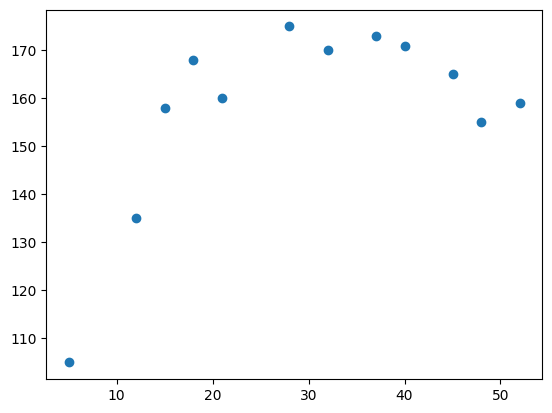

In [ ]:
plt.scatter(age, height)
plt.show()

El gráfico anterior es correcto, aunque un poco básico. Si lo deseamos, podemos añadir más detalles con un poco de código adicional:

* Tamaño de la figura
* Título principal (y tamaño de la fuente)
* Etiquetas en el eje X e Y (y tamaño de la fuente)
* Grid (cuadrícula)
* Texto para las etiquetas
* Legend (área de explicación de los elementos del gráfico)
* Líneas verticales (u horizontales)


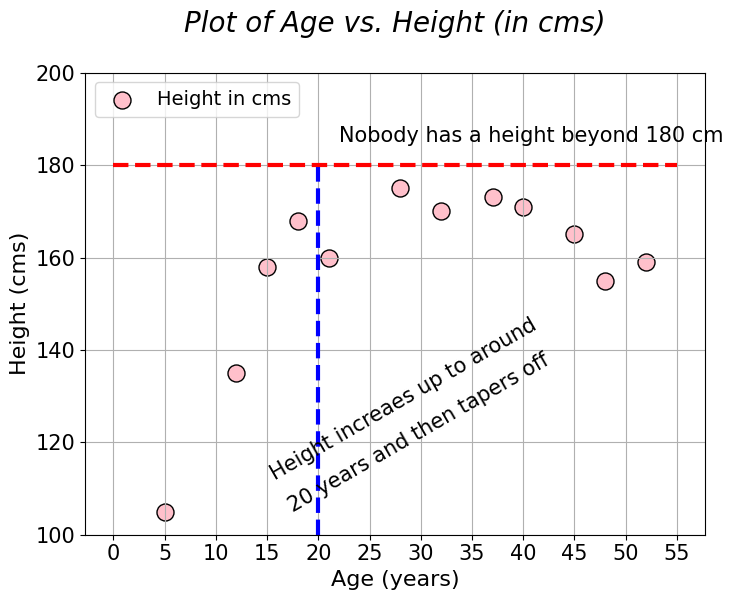

In [ ]:
# Set figure size
plt.figure(figsize=(8,6))

# Add a main title
plt.title("Plot of Age vs. Height (in cms)\n",fontsize=20, fontstyle='italic')

# X- and Y-label with fontsize
plt.xlabel("Age (years)",fontsize=16)
plt.ylabel("Height (cms)",fontsize=16)

# Turn on grid
plt.grid (True)

# Set Y-axis limit
plt.ylim(100,200)

# X- and Y-axis ticks customization with fontsize and placement
plt.xticks([i*5 for i in range(12)],fontsize=15)
plt.yticks(fontsize=15)

# Main plotting function with choice of color, marker size, and marker edge color
plt.scatter(x=age,y=height,c='pink',s=150,edgecolors='k')

# Adding bit of text to the plot
plt.text(x=15,y=105,s="Height increaes up to around \n20 years and then tapers off",fontsize=15,
         rotation=30, linespacing=2)
plt.text(x=22,y=185,s="Nobody has a height beyond 180 cm",fontsize=15)

# Adding a vertical line
plt.vlines(x=20,ymin=100,ymax=180,linestyles='dashed',color='blue',lw=3)

# Adding a horizontal line
plt.hlines(y=180,xmin=0,xmax=55,linestyles='dashed',color='red',lw=3)

# Adding a legend
plt.legend(['Height in cms'],loc=2,fontsize=14)

# Final show method
plt.show()

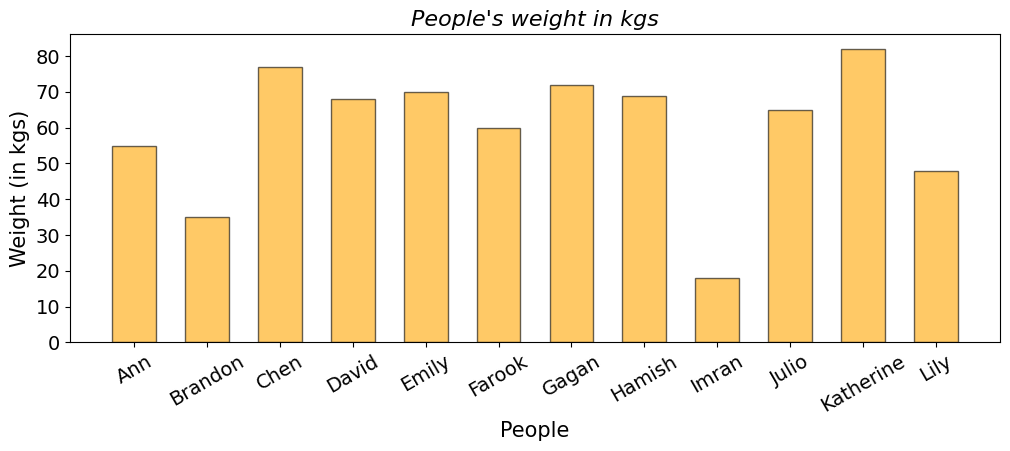

In [ ]:
plt.figure(figsize=(12,4))
plt.title("People's weight in kgs",fontsize=16, fontstyle='italic')
# Main plot function 'bar'
plt.bar(x=people,height=weight, width=0.6,color='orange',edgecolor='k',alpha=0.6)
plt.xlabel("People",fontsize=15)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14)
plt.ylabel("Weight (in kgs)",fontsize=15)
plt.show()

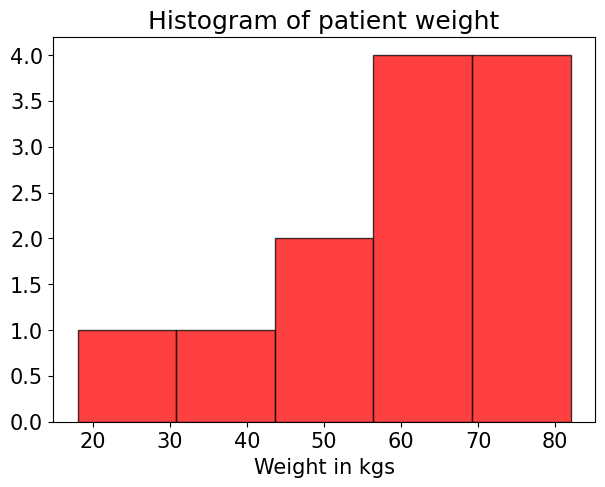

In [ ]:
import numpy as np
plt.figure(figsize=(7,5))
# Main plot function 'hist'
plt.hist(weight,color='red',edgecolor='k', alpha=0.75,bins=5)
plt.title("Histogram of patient weight",fontsize=18)
plt.xlabel("Weight in kgs",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### *Ejercicio 9*

Toma como base el csv sobre vinos que vimos en la última clase y crea los siguientes diagramas:
* Gráfico de puntos teniendo en cuenta 'Alcohol','Color intensity'
* Histograma teniendo en cuenta el 'Alcohol percentage'
* Un diagrama de barras de temática libre

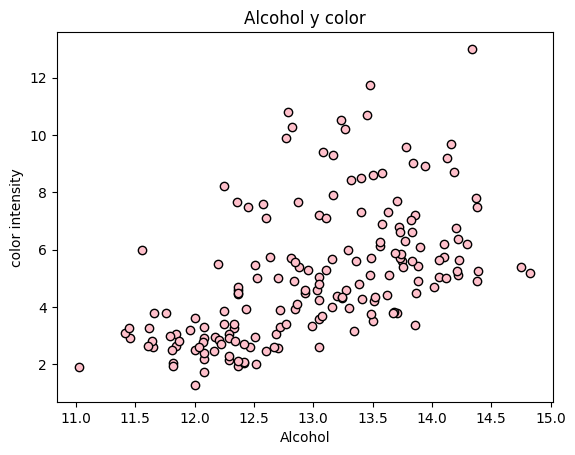

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

plt.scatter(x=wine_df.alcohol, y= wine_df.color_intensity, c='pink', edgecolor='k')
plt.title('Alcohol y color')
plt.xlabel("Alcohol")
plt.ylabel("color intensity")
plt.show()


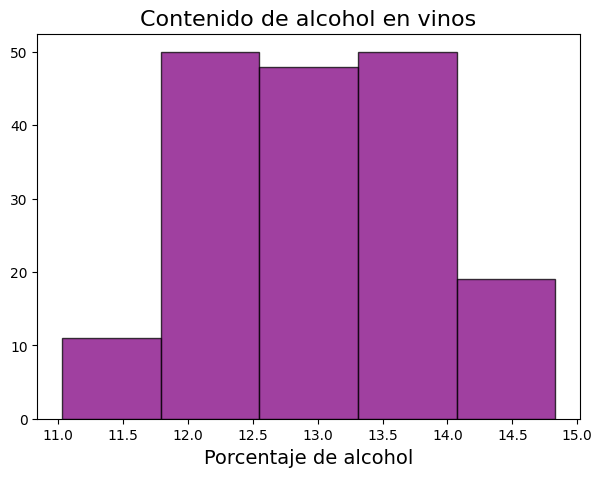

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Cargar el dataset de vinos
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Histograma del porcentaje de alcohol
plt.figure(figsize=(7,5))
plt.hist(wine_df['alcohol'],color='purple',edgecolor='k',alpha=0.75,bins=5)
plt.title("Contenido de alcohol en vinos", fontsize=16)
plt.xlabel("Porcentaje de alcohol", fontsize=14)
plt.show()


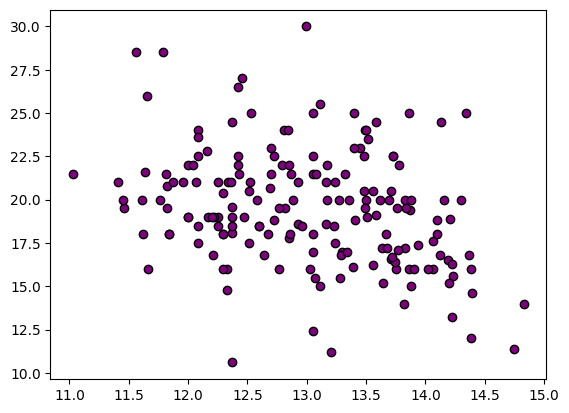

In [ ]:
plt.scatter(x=wine_df.alcohol, y=wine_df.alcalinity_of_ash, c='purple', edgecolor='k')

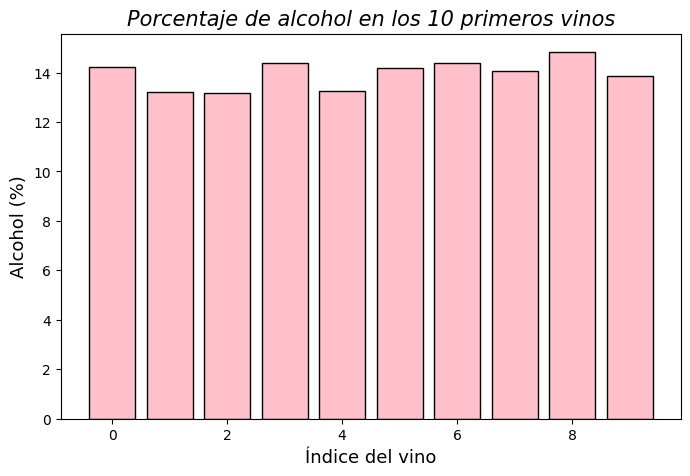

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
subset = wine_df.head(10) # toma los 10 primeros vinos 
plt.figure(figsize=(8,5))
# le mando el indiuce
plt.bar(subset.index, subset['alcohol'], color='pink', edgecolor='black')
plt.title("Porcentaje de alcohol en los 10 primeros vinos", fontsize=15, fontstyle='italic')
plt.xlabel("Índice del vino", fontsize=13)
plt.ylabel("Alcohol (%)", fontsize=13)
plt.show()
#muestra la cantidad de alcohol presente en los 10 primeros vinos



### *Ejercicio 10*
Accede a DataCamp y realiza el capítulo sobre "Reading and Cleaning Data" al cuál te ha dado invitado la profesora.

# Webgrafía


* [Curso de Luz Frías](https://github.com/koldLight/curso-python-analisis-datos)
* [Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
* *texto en cursiva*[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.